11403264/11490434 [============================>.] - ETA: 0s(50000, 28, 28) (50000,)


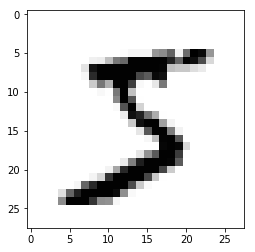

In [2]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [12]:
# import useful libs
import tensorflow as tf
import numpy as np


In [13]:
# define some values

feature_number = X_train.shape[1] * X_train.shape[2]
class_number = 10

train_size = X_train.shape[0]
validation_size = X_val.shape[0]
test_size = X_test.shape[0]

first_layer_input_size = feature_number / 2

In [14]:
def reshape_results(results, C):
    """
    [{classes}] --> [[is_class_0, ... , is_class_C]]
    """
    class_number = tf.constant(C, name = "C")
    classes = tf.one_hot(results, class_number, axis = 0)
    with tf.Session() as sess:
        reshaped_results = sess.run(one_hot_matrix)
    return reshaped_results

In [15]:
def predict_y(features, *layers):
    tmp = X
    for layer in layers:
        tmp = layer[2](tf.add(tf.matmul(tmp, layer[0]), layer[1]))
    return tmp

In [17]:
def initialize_layers(init_features, init_layers, initializer):
    layers = []
    input_features = init_features
    i = 0
    for init_layer in init_layers:
        si = str(i)
        layers.append((init_layer, 
                      tf.get_variable('W' + si, (init_layer, input_features,), initializer = initializer),
                      tf.Variable(tf.ones(init_layer), name='b' + si)))
        input_features = init_layer
        i += 1
    return layers

In [18]:
def loss(predicted_results, true_results):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predicted_results, labels=true_results))

In [ ]:
def create_minibatch(tf.train.shuffle_batch())

In [ ]:

input_X = tf.placeholder('float32', shape=(None, feature_number,), name='input_X')
input_y = tf.placeholder('float32', shape=(None,), name='input_y')

W1 = tf.get_variable(shape=(feature_number, feature_number / 2,), dtype=tf.float32,
                     name='W1', initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.ones((feature_number / 2,)), name="b1")

W2 = tf.get_variable(shape=(feature_number / 2, class_number), dtype=tf.float32,
                     name='W2', initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.ones((feature_number / 2,)), name="b2")

pred_y = tf.matmul(tf.nn.sigmoid(tf.matmul(input_X, W1) + b1), W2) + b2
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=pred_y))

optimizer = tf.train.AdamOptimizer().minimize